In [1]:
import json
import requests
%matplotlib inline

In [2]:
url = "https://data.seattle.gov/resource/pu5n-trf4.json"
params = {'$where':'event_clearance_description = "NOISE DISTURBANCE"','$limit':50000}
response = requests.get(url,params = params)
print response.url

https://data.seattle.gov/resource/pu5n-trf4.json?%24where=event_clearance_description+%3D+%22NOISE+DISTURBANCE%22&%24limit=50000


In [4]:
import pandas as pd
noise_data_r = pd.read_json(response.url)
#noise_data = pd.read_csv("noise_report.csv",sep='\t', encoding='utf-8')

In [5]:
noise_data_r.shape

(36501, 19)

In [6]:
#noise_data.to_csv("noise_report.csv",sep='\t', encoding='utf-8')

In [86]:
noise_data_r.head(20)

,at_scene_time,cad_cdw_id,cad_event_number,census_tract,district_sector,event_clearance_code,event_clearance_date,event_clearance_description,event_clearance_group,event_clearance_subgroup,general_offense_number,hundred_block_location,incident_location,initial_type_description,initial_type_group,initial_type_subgroup,latitude,longitude,zone_beat
0,2012-12-21 21:21:00,1004299,12000435444,10600.4000,W,244,2012-12-21T21:44:00.000,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,2012435444,64XX BLOCK OF CALIFORNIA AVE SW,"{u'type': u'Point', u'coordinates': [-122.3872...",FIREWORKS - NUISANCE (NO HAZARD),MISCELLANEOUS MISDEMEANORS,MISCELLANEOUS MISDEMEANORS,47.545680,-122.387206,W3
1,2012-12-21 20:53:00,1004323,12000435440,10900.2001,O,244,2012-12-21T21:17:00.000,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,2012435440,62XX BLOCK OF STANLEY AVE S,"{u'type': u'Point', u'coordinates': [-122.3155...","NOISE - DISTURBANCE (PARTY, ETC)",DISTURBANCES,DISTURBANCES,47.547482,-122.315509,O3
2,2012-12-21 20:10:00,1004339,12000435342,6600.3007,D,244,2012-12-21T20:38:00.000,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,2012435342,YALE AV E / E NEWTON ST,"{u'type': u'Point', u'coordinates': [-122.3271...",NUISANCE - MISCHIEF,MISCELLANEOUS MISDEMEANORS,MISCELLANEOUS MISDEMEANORS,47.636764,-122.327118,D2
3,2012-12-21 19:55:00,1004343,12000435364,10900.2072,O,244,2012-12-21T19:59:00.000,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,2012435364,65XX BLOCK OF 5TH PL S,"{u'type': u'Point', u'coordinates': [-122.3272...",HAZ - POTENTIAL THRT TO PHYS SAFETY (NO HAZMAT),HAZARDS,HAZARDS,47.544907,-122.327272,O3
4,2012-12-21 17:33:00,1004457,12000435108,9600.2013,W,244,2012-12-21T19:47:00.000,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,2012435108,42XX BLOCK OF SW ADMIRAL WAY,"{u'type': u'Point', u'coordinates': [-122.3858...","NOISE - DISTURBANCE (PARTY, ETC)",DISTURBANCES,DISTURBANCES,47.581191,-122.385859,W1
5,NaT,1004596,12000440340,7800.3012,G,244,2012-12-26T21:22:00.000,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,2012440340,3XX BLOCK OF 32ND AVE,"{u'type': u'Point', u'coordinates': [-122.2915...",NaN,NaN,NaN,47.604835,-122.291588,G3
6,NaT,100466,10000370151,8600.2007,E,244,2010-10-22T23:43:00.000,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,2010370151,4XX BLOCK OF 11TH AVE,"{u'type': u'Point', u'coordinates': [-122.3181...",NaN,NaN,NaN,47.605702,-122.318109,E3
7,NaT,101506,10000371516,8002.2008,M,244,2010-10-24T04:01:00.000,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,2010371516,XX BLOCK OF BELL ST,"{u'type': u'Point', u'coordinates': [-122.3478...",NaN,NaN,NaN,47.612378,-122.347802,M1
8,NaT,100472,10000370135,8200.2007,D,244,2010-10-22T23:33:00.000,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,2010370135,9XX BLOCK OF 8TH AVE,"{u'type': u'Point', u'coordinates': [-122.3281...",NaN,NaN,NaN,47.607588,-122.328145,D3
9,NaT,100475,10000369949,6700.2010,D,244,2010-10-22T20:38:00.000,NOISE DISTURBANCE,DISTURBANCES,DISTURBANCES,2010369949,8XX BLOCK OF 4TH AVE N,"{u'type': u'Point', u'coordinates': [-122.3488...",NaN,NaN,NaN,47.626725,-122.348860,D1


In [8]:
noise_data_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36501 entries, 0 to 36500
Data columns (total 19 columns):
at_scene_time                  5517 non-null datetime64[ns]
cad_cdw_id                     36501 non-null int64
cad_event_number               36501 non-null int64
census_tract                   36496 non-null object
district_sector                36501 non-null object
event_clearance_code           36501 non-null int64
event_clearance_date           36498 non-null object
event_clearance_description    36501 non-null object
event_clearance_group          36501 non-null object
event_clearance_subgroup       36501 non-null object
general_offense_number         36501 non-null int64
hundred_block_location         36501 non-null object
incident_location              36501 non-null object
initial_type_description       19152 non-null object
initial_type_group             19152 non-null object
initial_type_subgroup          19152 non-null object
latitude                       36501 non

### Fill missing value: (missing date and time)

In [63]:
# fill with last known values
#bfill
#noise_data2 = noise_data_r.copy()
#noise_data2['at_scene_time'].bfill(inplace = True)
#noise_data2.dropna(subset = ['at_scene_time'], axis = 0, inplace = True)
#ffill
#noise_data1 = noise_data_r.copy()
#noise_data1['at_scene_time'].ffill(inplace = True)
#noise_data1.dropna(subset = ['at_scene_time'],axis = 0, inplace = True)
noise_data = noise_data_r.copy()
noise_data['ff_at_scene_time'] = noise_data_r['at_scene_time'].ffill()
noise_data['bf_at_scene_time'] = noise_data_r['at_scene_time'].bfill()

In [64]:
noise_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36501 entries, 0 to 36500
Data columns (total 21 columns):
at_scene_time                  5517 non-null datetime64[ns]
cad_cdw_id                     36501 non-null int64
cad_event_number               36501 non-null int64
census_tract                   36496 non-null object
district_sector                36501 non-null object
event_clearance_code           36501 non-null int64
event_clearance_date           36498 non-null object
event_clearance_description    36501 non-null object
event_clearance_group          36501 non-null object
event_clearance_subgroup       36501 non-null object
general_offense_number         36501 non-null int64
hundred_block_location         36501 non-null object
incident_location              36501 non-null object
initial_type_description       19152 non-null object
initial_type_group             19152 non-null object
initial_type_subgroup          19152 non-null object
latitude                       36501 non

### Noise versus seasons and time

In [80]:
# form another column about hours
# form another column about date
# form another column about months: spring: 3-5; Summer: 6-8; Autumn: 9-11;Winter: 12-2
def getSeason(d):
    mo = d.month
    if mo>=3 and mo<=5:
        return 'spring'
    elif mo>=6 and mo<=8:
        return 'summer'
    elif mo>=9 and mo<=11:
        return 'autumn'
    else:
        return 'winter'
testrow = noise_data.iloc[1,:]
print getSeason(testrow.at_scene_time), testrow.at_scene_time.hour,testrow.at_scene_time.date()
noise_data['fhour'] = noise_data.apply(lambda row:row['ff_at_scene_time'].hour, axis = 1)
noise_data['fdate'] = noise_data.apply(lambda row:row['ff_at_scene_time'].date(),axis = 1)
noise_data['fseason'] = noise_data.apply(lambda row:getSeason(row['ff_at_scene_time']), axis = 1)
noise_data['fyear'] = noise_data.apply(lambda row:row['ff_at_scene_time'].year, axis = 1)
noise_data['bhour'] = noise_data.apply(lambda row:row['bf_at_scene_time'].hour, axis = 1)
noise_data['bdate'] = noise_data.apply(lambda row:row['bf_at_scene_time'].date(),axis = 1)
noise_data['bseason'] = noise_data.apply(lambda row:getSeason(row['bf_at_scene_time']), axis = 1)
noise_data['byear'] = noise_data.apply(lambda row:row['bf_at_scene_time'].year, axis = 1)
noise_data['hour'] = noise_data.apply(lambda row:row['at_scene_time'].hour, axis = 1)
noise_data['date'] = noise_data.apply(lambda row:row['at_scene_time'].date(),axis = 1)
noise_data['season'] = noise_data.apply(lambda row:getSeason(row['bf_at_scene_time']), axis = 1)
noise_data['year'] = noise_data.apply(lambda row:row['at_scene_time'].year, axis = 1)
print noise_data['year'].is_monotonic

winter 20 2012-12-21
False


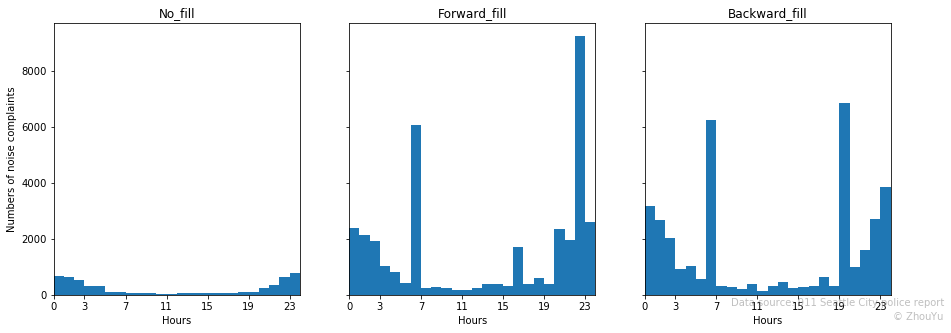

In [81]:
import matplotlib.pyplot as plt
import numpy as np
hour_bin = np.linspace(0,24,25)
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True,figsize = (15,5))
ax1.hist(noise_data['hour'].dropna(),bins = hour_bin)
ax1.set_xticks([0,3,7,11,15,19,23])
ax1.set_xlim(0,24)
ax1.set_xlabel('Hours')
ax1.set_ylabel('Numbers of noise complaints')
ax1.set_title('No_fill')
ax2.hist(noise_data['fhour'],bins = hour_bin)
ax2.set_xticks([0,3,7,11,15,19,23])
ax2.set_xlim(0,24)
ax2.set_xlabel('Hours')
ax2.set_title('Forward_fill')
f.text(
    0.95, 0.05,
    'Data source: 911 Seattle City police report\n$\copyright$ ZhouYu',
    ha='right', va='bottom',
    size=10,
    color='gray',alpha = 0.5)
#plt.subplots(122)
ax3.hist(noise_data['bhour'],bins = hour_bin)
ax3.set_xticks([0,3,7,11,15,19,23])
ax3.set_xlim(0,24)
ax3.set_xlabel('Hours')
#ax2.set_ylabel('Numbers of noise complaints')
ax3.set_title('Backward_fill')
plt.show()

2010-12-31 23:32:00 2017-03-05 15:52:52
2011-01-01 00:00:00 2016-12-31 23:59:59
{'autumn': 5918, 'summer': 7514, 'winter': 17833, 'spring': 4521}
{'autumn': 5875, 'summer': 20751, 'winter': 4601, 'spring': 4523}
{'autumn': 1584, 'summer': 1672, 'winter': 1002, 'spring': 1071}


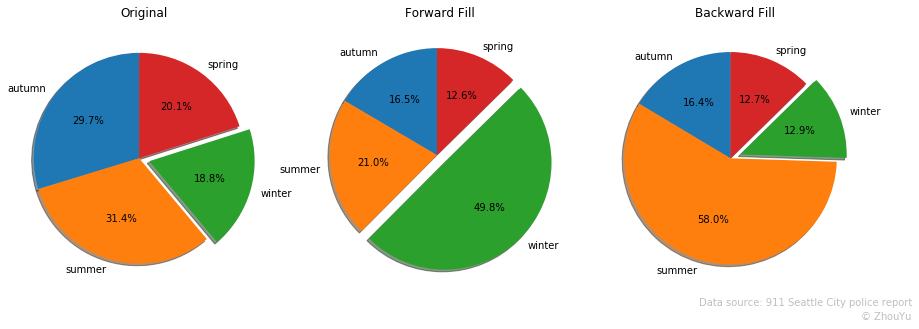

In [74]:
ini_datetime = noise_data['at_scene_time'].min()
end_datetime = noise_data['at_scene_time'].max()
print noise_data['at_scene_time'].min(), noise_data['at_scene_time'].max()
st_datetime = pd.to_datetime('2011/1/1')
ed_datetime = pd.to_datetime('2016/12/31 23:59:59')
print st_datetime, ed_datetime
season_analysis_ff = noise_data.ix[(noise_data['ff_at_scene_time']>=st_datetime)&(noise_data['ff_at_scene_time']<=ed_datetime)]
seasonal_noise_ff = (season_analysis_ff['fseason'].value_counts()).to_dict()
season_analysis_bf = noise_data.ix[(noise_data['bf_at_scene_time']>=st_datetime)&(noise_data['bf_at_scene_time']<=ed_datetime)]
seasonal_noise_bf = (season_analysis_bf['bseason'].value_counts()).to_dict()
noise_s =noise_data.dropna(subset = ['at_scene_time'],axis = 0)
season_analysis = noise_s.ix[(noise_data['at_scene_time']>=st_datetime)&(noise_data['at_scene_time']<=ed_datetime)]
seasonal_noise = (season_analysis['season'].value_counts()).to_dict()
print seasonal_noise_ff
print seasonal_noise_bf
print seasonal_noise
#print noise_data['season'].value_counts()
labels = seasonal_noise.keys()
freq = np.array(seasonal_noise.values())
freq= freq/float(np.sum(freq))
labels_ff = seasonal_noise_ff.keys()
freq_ff = np.array(seasonal_noise_ff.values())
freq_ff = freq_ff/float(np.sum(freq_ff))
labels_bf = seasonal_noise_bf.keys()
freq_bf = np.array(seasonal_noise_bf.values())
freq_bf = freq_bf/float(np.sum(freq_bf))
explode = (0,0,0.1,0)
fig1,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5))
ax1.pie(freq,explode = explode,labels = labels,autopct = '%1.1f%%',shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title('Original')
ax2.pie(freq_ff,explode = explode,labels = labels,autopct = '%1.1f%%',shadow = True, startangle = 90)
ax2.axis('equal')
ax2.set_title('Forward Fill')
fig1.text(
    0.95, 0.05,
    'Data source: 911 Seattle City police report\n$\copyright$ ZhouYu',
    ha='right', va='bottom',
    size=10,
    color='gray',alpha = 0.5)
ax3.pie(freq_bf,explode = explode,labels = labels,autopct = '%1.1f%%',shadow = True, startangle = 90)
ax3.axis('equal')
ax3.set_title('Backward Fill')
plt.show()

[2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0]


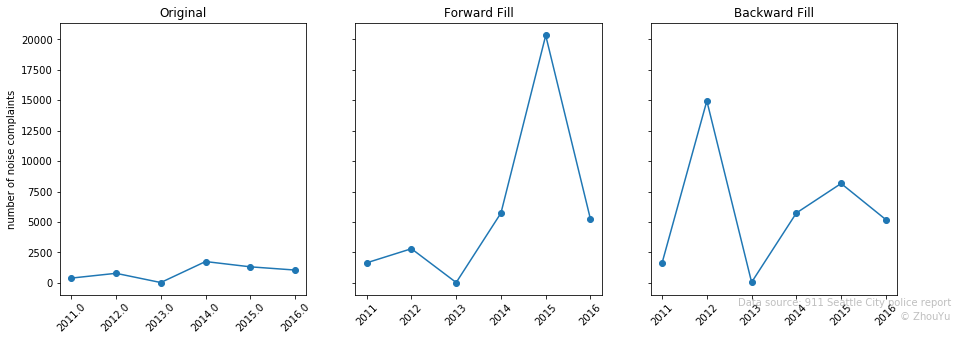

In [163]:
yearly_noise= (season_analysis['year'].value_counts()).to_dict()
years = sorted(yearly_noise.keys())
noise_byyear = [yearly_noise[x] for x in years]
yearly_noise_ff = (season_analysis_ff['fyear'].value_counts()).to_dict()
years_ff = sorted(yearly_noise_ff.keys())
noise_byyear_ff = [yearly_noise_ff[x] for x in years_ff]
yearly_noise_bf = (season_analysis_bf['byear'].value_counts()).to_dict()
years_bf = sorted(yearly_noise_bf.keys())
noise_byyear_bf = [yearly_noise_bf[x] for x in years_bf]
print years
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,5))
ax1.plot(years,noise_byyear,'-o')
ax1.set_xticks(years)
ax1.set_xticklabels(map(str,years),rotation = 45)
ax1.set_title('Original')
ax1.set_ylabel('number of noise complaints')
ax2.plot(years_ff,noise_byyear_ff,'-o')
ax2.set_xticks(years_ff)
ax2.set_xticklabels(map(str,years_ff),rotation = 45)
ax2.set_title('Forward Fill')
fig.text(
    0.95, 0.05,
    'Data source: 911 Seattle City police report\n$\copyright$ ZhouYu',
    ha='right', va='bottom',
    size=10,
    color='gray',alpha = 0.5)
ax3.plot(years_bf,noise_byyear_bf,'-o')
ax3.set_xticks(years_bf)
ax3.set_xticklabels(map(str,years_bf),rotation = 45)
ax3.set_title('Backward Fill')
plt.show()

### Add*: It seems that most complains happen in 2015

### 1. Use event_clearance_date  as an approximation of event date time

In [122]:
clear_noise = season_analysis.dropna(subset = ['event_clearance_date'],axis = 0)
clear_noise['event_clearance_datetime'] = pd.to_datetime(clear_noise['event_clearance_date'])
clear_noise['process_time'] = clear_noise['event_clearance_datetime']-clear_noise['at_scene_time']
clear_noise['process_time'] = clear_noise.apply(lambda row:row['process_time'].seconds/60, axis = 1)


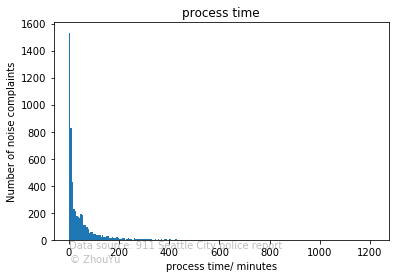

In [137]:
plt.hist(clear_noise['process_time'],bins = 'auto')
plt.xlabel('process time/ minutes')
plt.ylabel('Number of noise complaints')
plt.title('process time')
plt.text(
    0.95, 0.05,
    'Data source: 911 Seattle City police report\n$\copyright$ ZhouYu',
    ha='left', va='top',
    size=10,
    color='gray',alpha = 0.5)
plt.show()

### It seems that use clerance date would be good approximation!

In [155]:
clear_noise_s = (noise_data_r.dropna(subset = ['event_clearance_date'],axis = 0)).copy()
clear_noise_s['event_clearance_datetime'] = pd.to_datetime(clear_noise_s['event_clearance_date'])
print a.shape
print clear_noise_s.shape
#clear_noise_s['event_clearance_datetime'] #= 

(36498,)
(36498, 20)


In [156]:
clear_noise_s['hour'] = clear_noise_s.apply(lambda row:row['event_clearance_datetime'].hour, axis = 1)
clear_noise_s['date'] = clear_noise_s.apply(lambda row:row['event_clearance_datetime'].date(),axis = 1)
clear_noise_s['season'] = clear_noise_s.apply(lambda row:getSeason(row['event_clearance_datetime']), axis = 1)
clear_noise_s['year'] = clear_noise_s.apply(lambda row:row['event_clearance_datetime'].year, axis = 1)
clc_season_analysis = clear_noise_s.ix[(clear_noise_s['event_clearance_datetime']>=st_datetime)&(clear_noise_s['event_clearance_datetime']<=ed_datetime)]

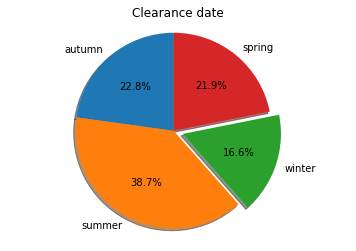

In [160]:
seasonal_noise_c = (clc_season_analysis['season'].value_counts()).to_dict()
labels = seasonal_noise_c.keys()
freq = np.array(seasonal_noise_c.values())
freq= freq/float(np.sum(freq))
fig, ax = plt.subplots()
ax.pie(freq,explode = explode,labels = labels,autopct = '%1.1f%%',shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title('Clearance date')
fig.text(
    0.95, 0.05,
    'Data source: 911 Seattle City police report\n$\copyright$ ZhouYu',
    ha='right', va='bottom',
    size=10,
    color='gray',alpha = 0.5)
plt.show()

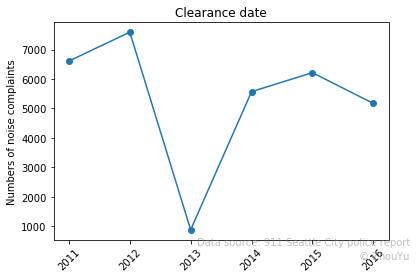

In [164]:
yearly_noise= (clc_season_analysis['year'].value_counts()).to_dict()
years = sorted(yearly_noise.keys())
noise_byyear = [yearly_noise[x] for x in years]
fig, ax1= plt.subplots()
ax1.plot(years,noise_byyear,'-o')
ax1.set_xticks(years)
ax1.set_xticklabels(map(str,years),rotation = 45)
fig.text(
    0.95, 0.05,
    'Data source: 911 Seattle City police report\n$\copyright$ ZhouYu',
    ha='right', va='bottom',
    size=10,
    color='gray',alpha = 0.5)
ax1.set_title('Clearance date')
ax1.set_ylabel('Numbers of noise complaints')
plt.show()

### Noise versus locations

In [102]:
testrow

at_scene_time                                                2012-12-21 20:53:00
cad_cdw_id                                                               1004323
cad_event_number                                                     12000435440
census_tract                                                          10900.2001
district_sector                                                                O
event_clearance_code                                                         244
event_clearance_date                                     2012-12-21T21:17:00.000
event_clearance_description                                    NOISE DISTURBANCE
event_clearance_group                                               DISTURBANCES
event_clearance_subgroup                                            DISTURBANCES
general_offense_number                                                2012435440
hundred_block_location                               62XX BLOCK OF STANLEY AVE S
incident_location           

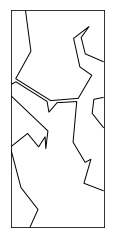

In [11]:
from mpl_toolkits.basemap import Basemap
coords_lon = noise_data['longitude'].min(), noise_data['longitude'].max()
coords_lat = noise_data['latitude'].min(), noise_data['latitude'].max()
w = coords_lon[1]-coords_lon[0]
h = coords_lat[1]-coords_lat[0]
m = Basemap(llcrnrlon = coords_lon[0]-0.01*w,llcrnrlat=coords_lat[0]-0.01*h,
            urcrnrlon=coords_lon[1]+0.01*w,urcrnrlat=coords_lat[1]+0.01*h,
        projection='tmerc',ellps = 'WGS84',lat_ts =0,
            lat_0 = np.mean(coords_lat),lon_0=np.mean(coords_lon),resolution = 'i',
           suppress_ticks = True)
m.readshapefile('neighborhoods/WGS84/Neighborhoods','seattle',color = 'none',zorder = 2,drawbounds = True)
# load the shapefile, use the name 'states'
#map.readshapefile('st99_d00', name='states', drawbounds=True)
m.drawcoastlines()
#m.drawstates()
#m.drawrivers()
#m.plot(41,-87, marker = 'o')


In [12]:
# set up a map dataframe
from lxml import etree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
from pysal.esda.mapclassify import Natural_Breaks as nb
from descartes import PolygonPatch
import fiona
from itertools import chain

df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.seattle],
    'hood_name': [hood['S_HOOD'] for hood in m.seattle_info]})
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000

# Create Point objects in map coordinates from dataframe lon and lat values
map_points = pd.Series(
    [Point(m(mapped_x, mapped_y)) for mapped_x, mapped_y in zip(noise_data['longitude'], noise_data['latitude'])])
incident_points = MultiPoint(list(map_points.values))
hood_polygon = prep(MultiPolygon(list(df_map['poly'].values)))
# calculate points that fall within the London boundary
ldn_points = filter(hood_polygon.contains, incident_points)

In [15]:
from matplotlib.colors import LinearSegmentedColormap
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in xrange(N + 1)]
    return LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

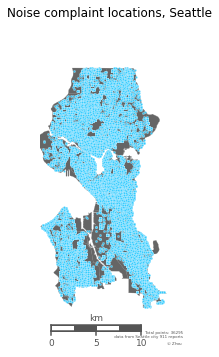

In [16]:
# draw ward patches from polygons
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(
    x,
    fc='#555555',
    ec='#787878', lw=.25, alpha=.9,
    zorder=4))

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

# we don't need to pass points to m() because we calculated using map_points and shapefile polygons
dev = m.scatter(
    [geom.x for geom in ldn_points],
    [geom.y for geom in ldn_points],
    5, marker='o', lw=.25,
    facecolor='#33ccff', edgecolor='w',
    alpha=0.9, antialiased=True,
    label='Noise Campliant Location', zorder=3)
# plot boroughs by adding the PatchCollection to the axes instance
ax.add_collection(PatchCollection(df_map['patches'].values, match_original=True))
# copyright and source data info
smallprint = ax.text(
    1.03, 0,
    'Total points: %s\n data from Seattle city 911 reports\n$\copyright$ Zhou' % len(ldn_points),
    ha='right', va='bottom',
    size=4,
    color='#555555',
    transform=ax.transAxes)

# Draw a map scale
m.drawmapscale(
    coords_lon[0] + 0.08, coords_lat[0] + 0.015,
    coords_lon[0], coords_lat[0],
    10.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)
plt.title("Noise complaint locations, Seattle")
plt.tight_layout()
# this will set the image width to 722px at 100dpi
fig.set_size_inches(7.22, 5.25)
#plt.savefig('data/london_plaques.png', dpi=100, alpha=True)
plt.show()

In [17]:
df_map['count'] = df_map['poly'].map(lambda x: int(len(filter(prep(x).contains, ldn_points))))
df_map['density_m'] = df_map['count'] / df_map['area_m']
df_map['density_km'] = df_map['count'] / df_map['area_km']
# it's easier to work with NaN values when classifying
df_map.replace(to_replace={'density_m': {0: np.nan}, 'density_km': {0: np.nan}}, inplace=True)

In [18]:
breaks = nb(
    df_map[df_map['density_km'].notnull()].density_km.values,
    initial=300,
    k=5)
# the notnull method lets us match indices when joining
jb = pd.DataFrame({'jenks_bins': breaks.yb}, index=df_map[df_map['density_km'].notnull()].index)
df_map = df_map.join(jb)
df_map.jenks_bins.fillna(-1, inplace=True)

In [19]:
#jenks_labels = ["<= %0.1f/km incidents $^2$(%s neighborhooods)" % (b, c) for b, c in zip(
#    breaks.bins, breaks.counts)]
jenks_labels = ["<= %0.1f incidents/km$^2$"%b for b in breaks.bins]
jenks_labels.insert(0, 'No complaint (%s neighborhoods)' % len(df_map[df_map['density_km'].isnull()]))

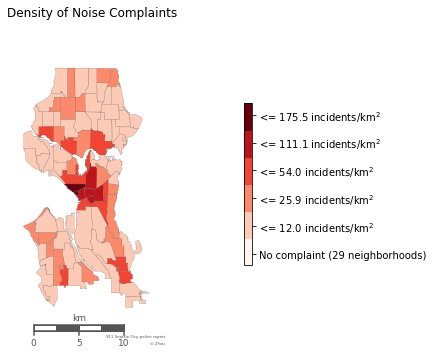

In [20]:
#from matplotlib import *
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

# use a blue colour ramp - we'll be converting it to a map using cmap()
cmap = plt.get_cmap('Reds')
# draw wards with grey outlines
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(x, ec='#555555', lw=.2, alpha=1., zorder=4))
pc = PatchCollection(df_map['patches'], match_original=True)
# impose our colour map onto the patch collection
norm = Normalize()
pc.set_facecolor(cmap(norm(df_map['jenks_bins'].values)))
ax.add_collection(pc)

# Add a colour bar
cb = colorbar_index(ncolors=len(jenks_labels), cmap=cmap, shrink=0.5, labels=jenks_labels)
#cb.ax.tick_params(labelsize=6)

# Show highest densities, in descending order
#highest = '\n'.join(
#    value[1] for _, value in df_map[(df_map['jenks_bins'] == 4)][:10].sort().iterrows())
#highest = 'Most Dense Complains:\n\n' + highest
# Subtraction is necessary for precise y coordinate alignment
#details = cb.ax.text(
#   -1., 0 - 0.007,
#    highest,
#    ha='right', va='bottom',
#    size=5,
#    color='#555555')

# Bin method, copyright and source data info
smallprint = ax.text(
    1.03, 0,
    '911 Seattle City police report\n$\copyright$ Zhou',
    ha='right', va='bottom',
    size=4,
    color='#555555',
    transform=ax.transAxes)

# Draw a map scale
m.drawmapscale(
    coords_lon[0] + 0.08, coords_lat[0] + 0.015,
    coords_lon[0], coords_lat[0],
    10.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#555555',
    fontcolor='#555555',
    zorder=5)
# this will set the image width to 722px at 100dpi
plt.title('Density of Noise Complaints')
plt.tight_layout()
fig.set_size_inches(7.22, 5.25)
#plt.savefig('data/london_plaques.png', dpi=100, alpha=True)
plt.show()


In [20]:
np.sum(df_map['count'])

36295